In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysd
from SALib.sample import saltelli
from SALib.analyze import sobol
import scipy as sp

# Load Calibration data

In [2]:
data = pd.read_csv("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/data/dynamic/calibration_incidence.csv", sep=',',decimal='.')
data=data.drop("Unnamed: 0",axis=1)
data.head(23)


,year,var,Lower,Mean,Upper
0,2000,e_inc_num,56000,139000,259000
1,2001,e_inc_num,57000,159000,312000
2,2002,e_inc_num,57000,175000,357000
3,2003,e_inc_num,54000,206000,456000
4,2004,e_inc_num,54000,221000,501000
5,2005,e_inc_num,56000,226000,510000
6,2006,e_inc_num,56000,239000,549000
7,2007,e_inc_num,60000,235000,525000
8,2008,e_inc_num,66000,221000,467000
9,2009,e_inc_num,68000,228000,483000


Text(0.5, 1.0, 'Estimated Incident cases of TB')

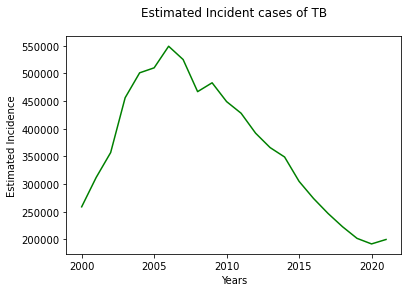

In [3]:
plt.plot(data["year"], data['Upper'],label="mean_estimate",color="green")
plt.xlabel('Years')
plt.ylabel('Estimated Incidence')
plt.title("Estimated Incident cases of TB",pad=20)

# Load Model

In [5]:
model = pysd.read_vensim("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/model/transmission/V13_years.mdl")

In [6]:
model_output = model.run()


<AxesSubplot:>

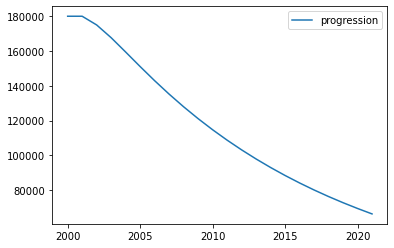

In [7]:
model_output.plot(y="progression")

## Calibration - Mean

In [15]:
#Set up observable and claibration parameters
observable = "progression"
parameter1 = 'transmission rate'
parameter2 = 'relapse rate'
parameter3 = 'initial incident'
parameter4="progression rate"
parameter5 = 'initial latent'
parameter6 = 'progression time'




def error(param_list):
    #unpack the parameter list
    parameter1_value,parameter2_value,parameter3_value,parameter4_value,parameter5_value,parameter6_value = param_list
    #run the model with the new parameters, returning the info we're interested in
    result = model.run(params={'transmission rate':parameter1_value,
                               'relapse rate':parameter2_value,
                               'initial incident': parameter3_value,
                               "progression rate":parameter4_value,
                               'initial latent': parameter5_value,
                               'progression time': parameter6_value
                              },
                       return_columns=['progression'])
    #print(result['progression'] -data['Mean'])
    
    result=result.reset_index(drop=True)
    #print(result)
    calDat=data.reset_index(drop=True)
    calDat=calDat["Mean"]
    
    error=sum((result['progression'] - calDat)**2)
    #print(error)
    #return the sum of the squared errors
    return  error

In [16]:
parameter1_guess = 0.05
parameter1_bounds = (0.0, 1)

parameter2_guess = 0.1
parameter2_bounds = (0.004, 0.1)

parameter3_guess = 100000
parameter3_bounds = (1, 3000000)

parameter4_guess = 0.08
parameter4_bounds = (0, 0.2)


parameter5_guess = 100000
parameter5_bounds = (1, 3000000)

parameter6_guess = 2
parameter6_bounds = (1,5)



res = sp.optimize.minimize(error,
                           x0=[parameter1_guess,parameter2_guess,parameter3_guess,parameter4_guess,parameter5_guess,parameter6_guess],
                           method='L-BFGS-B',
                           bounds=[parameter1_bounds,parameter2_bounds,parameter3_bounds,parameter4_bounds,parameter5_bounds,parameter6_bounds])
res

      fun: 823510209.12376
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.03380585e+06,  1.72981470e+10, -2.14325581e+02, -9.05442238e+06,
        5.12000000e+02, -2.80356409e+05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1043
      nit: 84
     njev: 149
   status: 0
  success: True
        x: array([3.68338262e-01, 4.00000000e-03, 1.97100925e+06, 1.55857374e-01,
       9.88380716e+05, 3.96606523e+00])

In [17]:
p1, p2, p3,p4,p5,p6= res.x
result_mean = model.run(params=
                   {
                       'transmission rate':p1,
                               'relapse rate':p2,
                               'initial incident': p3,
                               "progression rate":p4,
                       'initial latent': p5,
                       'progression time': p6
                   },
                   return_columns=['progression'])



## Calibration - Lower

In [18]:
#Set up observable and claibration parameters
observable = "progression"
parameter1 = 'transmission rate'
parameter2 = 'relapse rate'
parameter3 = 'initial incident'
parameter4="progression rate"
parameter5 = 'initial latent'
parameter6 = 'progression time'




def error(param_list):
    #unpack the parameter list
    parameter1_value,parameter2_value,parameter3_value,parameter4_value,parameter5_value,parameter6_value = param_list
    #run the model with the new parameters, returning the info we're interested in
    result = model.run(params={'transmission rate':parameter1_value,
                               'relapse rate':parameter2_value,
                               'initial incident': parameter3_value,
                               "progression rate":parameter4_value,
                               'initial latent': parameter5_value,
                               'progression time': parameter6_value
                              },
                       return_columns=['progression'])
    #print(result['progression'] -data['Mean'])
    
    result=result.reset_index(drop=True)
    #print(result)
    calDat=data.reset_index(drop=True)
    calDat=calDat["Lower"]
    
    error=sum((result['progression'] - calDat)**2)
    #print(error)
    #return the sum of the squared errors
    return  error

In [19]:
parameter1_guess = 0.05
parameter1_bounds = (0.0, 1)

parameter2_guess = 0.1
parameter2_bounds = (0.004, 0.1)

parameter3_guess = 100000
parameter3_bounds = (1, 3000000)

parameter4_guess = 0.08
parameter4_bounds = (0, 0.2)


parameter5_guess = 100000
parameter5_bounds = (1, 3000000)

parameter6_guess = 2
parameter6_bounds = (1,5)



res = sp.optimize.minimize(error,
                           x0=[parameter1_guess,parameter2_guess,parameter3_guess,parameter4_guess,parameter5_guess,parameter6_guess],
                           method='L-BFGS-B',
                           bounds=[parameter1_bounds,parameter2_bounds,parameter3_bounds,parameter4_bounds,parameter5_bounds,parameter6_bounds])
res

      fun: 555888429.5039761
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.30371450e+08,  1.15389426e+10, -1.43091703e+03, -1.78115428e+08,
       -1.66697674e+02, -3.80254986e+06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 301
      nit: 16
     njev: 43
   status: 0
  success: True
        x: array([6.20146499e-01, 4.00000000e-03, 1.23501436e+05, 1.99906191e-01,
       2.77566403e+05, 3.89476010e+00])

In [20]:
p1, p2, p3,p4,p5,p6= res.x
result_lower = model.run(params=
                   {
                       'transmission rate':p1,
                               'relapse rate':p2,
                               'initial incident': p3,
                               "progression rate":p4,
                       'initial latent': p5,
                       'progression time': p6
                   },
                   return_columns=['progression'])

## Calibration - Upper

In [26]:
#Set up observable and claibration parameters
observable = "progression"
parameter1 = 'transmission rate'
parameter2 = 'relapse rate'
parameter3 = 'initial incident'
parameter4="progression rate"
parameter5 = 'initial latent'
parameter6 = 'progression time'




def error(param_list):
    #unpack the parameter list
    parameter1_value,parameter2_value,parameter3_value,parameter4_value,parameter5_value,parameter6_value = param_list
    #run the model with the new parameters, returning the info we're interested in
    result = model.run(params={'transmission rate':parameter1_value,
                               'relapse rate':parameter2_value,
                               'initial incident': parameter3_value,
                               "progression rate":parameter4_value,
                               'initial latent': parameter5_value,
                               'progression time': parameter6_value
                              },
                       return_columns=['progression'])
    #print(result['progression'] -data['Mean'])
    
    result=result.reset_index(drop=True)
    #print(result)
    calDat=data.reset_index(drop=True)
    calDat=calDat["Upper"]
    
    error=sum((result['progression'] - calDat)**2)
    #print(error)
    #return the sum of the squared errors
    return  error

In [27]:
parameter1_guess = 0.05
parameter1_bounds = (0.0, 1)

parameter2_guess = 0.1
parameter2_bounds = (0.004, 0.1)

parameter3_guess = 100000
parameter3_bounds = (1, 3000000)

parameter4_guess = 0.08
parameter4_bounds = (0, 0.2)


parameter5_guess = 100000
parameter5_bounds = (1, 3000000)

parameter6_guess = 2
parameter6_bounds = (1,5)



res = sp.optimize.minimize(error,
                           x0=[parameter1_guess,parameter2_guess,parameter3_guess,parameter4_guess,parameter5_guess,parameter6_guess],
                           method='L-BFGS-B',
                           bounds=[parameter1_bounds,parameter2_bounds,parameter3_bounds,parameter4_bounds,parameter5_bounds,parameter6_bounds])
res

      fun: 75542338440.0983
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.02986633e+10,  1.12346775e+12, -2.34057143e+04, -1.36877747e+09,
        3.12076190e+04,  5.16824191e+09])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 462
      nit: 35
     njev: 66
   status: 0
  success: True
        x: array([3.72715138e-01, 4.00000000e-03, 3.00000000e+06, 1.39324258e-01,
       2.99188286e+06, 4.99984876e+00])

In [28]:
p1, p2, p3,p4,p5,p6= res.x
result_upper = model.run(params=
                   {
                       'transmission rate':p1,
                               'relapse rate':p2,
                               'initial incident': p3,
                               "progression rate":p4,
                       'initial latent': p5,
                       'progression time': p6
                   },
                   return_columns=['progression'])

## Plot calibrtaion results

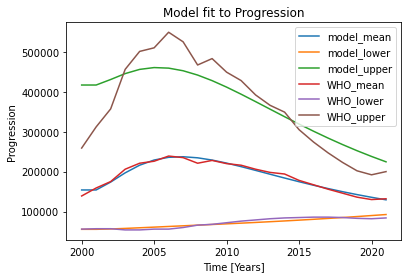

In [30]:
plt.plot(result_mean.index, result_mean['progression'],label="model_mean")
plt.plot(result_lower.index, result_lower['progression'],label="model_lower")
plt.plot(result_upper.index, result_upper['progression'],label="model_upper")
plt.plot(data["year"], data['Mean'], label='WHO_mean');
plt.plot(data["year"], data['Lower'], label='WHO_lower');
plt.plot(data["year"], data['Upper'], label='WHO_upper');
plt.xlabel('Time [Years]')
plt.ylabel('Progression')
plt.title('Model fit to Progression')
plt.legend(loc='upper right')
#plt.text(30,750000000, 'RMSE: 7.39% of Max', color='r', fontsize=12)